In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer, AerSimulator, StatevectorSimulator, QasmSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Step 1: Create a quantum circuit with 1 qubit
qc = QuantumCircuit(1)


In [3]:
# Step 2: Initialize the qubit in the |0> state (representing the original frequency of the wave)
qc.initialize([1, 0], 0)



In [4]:
# Step 3: Apply a Hadamard gate to put the qubit in superposition (simulating the wave propagation)
# This represents the wave traveling from the source, and both approaching and receding cases can be modeled
qc.h(0)



In [5]:
# Step 4: Apply a Phase gate to simulate the Doppler effect for an approaching source (frequency increase)
# The phase shift corresponds to the perceived increase in frequency as the wave approaches the observer
qc.p(np.pi/3, 0)  # Phase shift representing the frequency shift when the source is moving towards the observer



In [6]:
# Step 5: Apply a Pauli-X gate to simulate the source moving away (frequency decrease)
# This models the transition to a lower frequency when the source moves away from the observer
qc.x(0)



In [7]:
# Step 6: Apply another Phase gate to simulate the Doppler effect for a receding source (frequency decrease)
# The phase shift corresponds to the perceived decrease in frequency as the wave moves away from the observer
qc.p(-np.pi/3, 0)



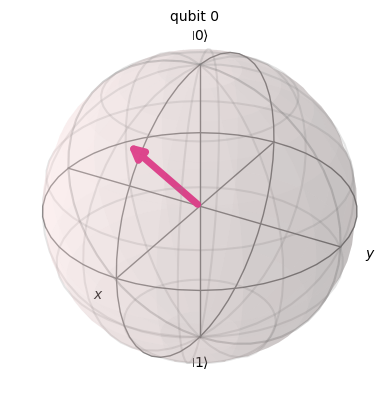

In [9]:
# Step 7: Visualize the qubit's state on the Bloch sphere to observe the phase shift (frequency change)

final_state = StatevectorSimulator().run(qc).result().get_statevector()

plot_bloch_multivector(final_state)



In [10]:
# Step 8: Measure the qubit to observe the final phase (representing the perceived frequency at a specific point in time)
qc.measure_all()



In [11]:
# Step 9: Simulate the measurement and plot the results

simulator = QasmSimulator()
result = simulator.run(qc, shots=1024).result()
counts = result.get_counts()



Measurement results: {'0': 526, '1': 498}


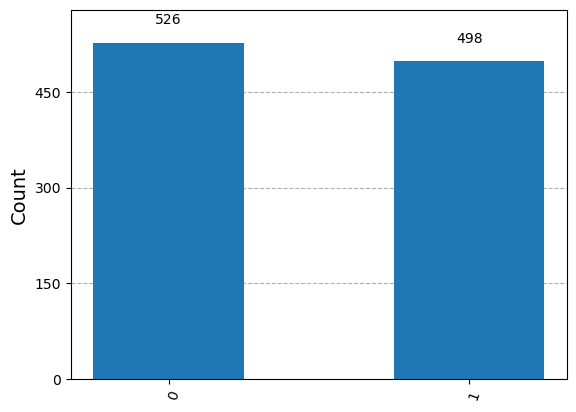

In [12]:
# Print the measurement results and plot the histogram
print(f"Measurement results: {counts}")
plot_histogram(counts)



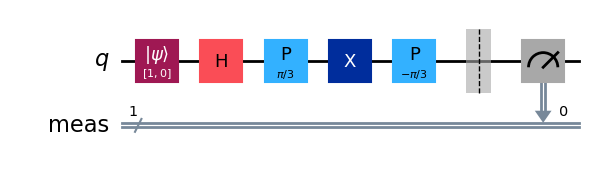

In [13]:
# Draw the quantum circuit
qc.draw(output='mpl')